## Check 1st level multiple models predictions

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
!python3 ../scripts/submission_avg_models.py ../output/predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138


Write submission as average proba of multiple models predictions



In [3]:
import os
import sys
import numpy as np

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)
    
os.environ['PRETRAINED_MODELS'] = '../../../pretrained-models.pytorch/'
os.environ['IGNITE_PATH'] = '../../../pytorch-ignite-master/'
ignite_path = os.environ['IGNITE_PATH']
if ignite_path not in sys.path:
    sys.path.append(ignite_path)

In [4]:
output_path = os.path.join("..", "output", "predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138")

In [5]:
from glob import glob

In [8]:
filenames = glob(os.path.join(output_path, "*.npz"))

In [9]:
filenames

['../output/predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138/y_probas_2_IcebergInceptionV4.npz',
 '../output/predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138/y_probas_1_IcebergInceptionV4.npz',
 '../output/predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138/y_probas_0_IcebergInceptionV4.npz',
 '../output/predictions_config_kfolds_inceptionv4_20171203_1100_20171203_2138/y_probas_3_IcebergInceptionV4.npz']

In [15]:
y_probas_list = []
data_ids_list = []
for f in filenames:
    ret = np.load(f)
    y_probas_list.append(ret['y_probas'])
    data_ids_list.append(ret['data_ids'])

In [16]:
from common.dataflow import get_image_by_id, get_test_df

import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

from common.dataflow_visu_utils import display_image

In [14]:
test_df = get_test_df()

In [18]:
def display_predictions(data_ids, y_probas, test_df):
    nx = 10
    ny = 2

    fig = plt.figure(figsize=(24,24))
    grid = ImageGrid(fig, 111, nrows_ncols=(ny, nx), axes_pad=0.05)

    i = 0
    j = 0
    for k, (image_id, y_proba) in enumerate(zip(data_ids, y_probas)):

        x = get_image_by_id(image_id, test_df)
        ax = grid[k]
        display_image(ax, x, image_id, "b12", 0, target="%.4f" % y_proba[1])
        i = (i + 1) % nx
        if i == 0:
            j = (j + 1) % ny
            if j == 0:
                break

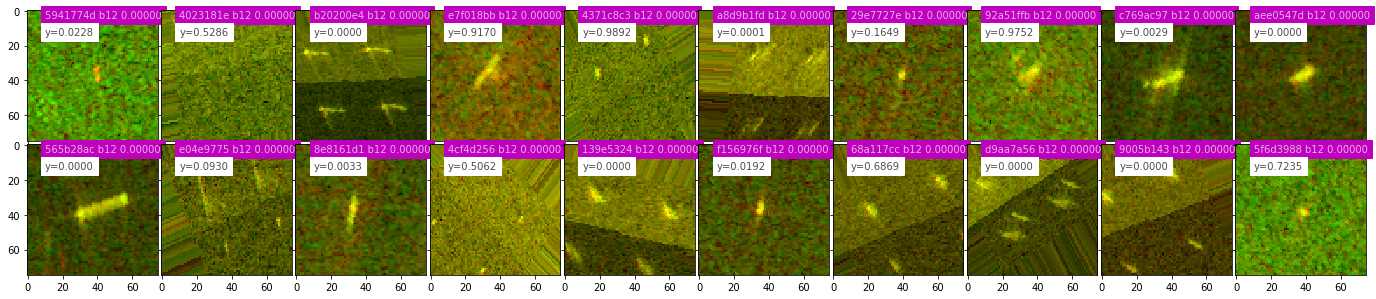

In [19]:
display_predictions(data_ids_list[0], y_probas_list[0], test_df)

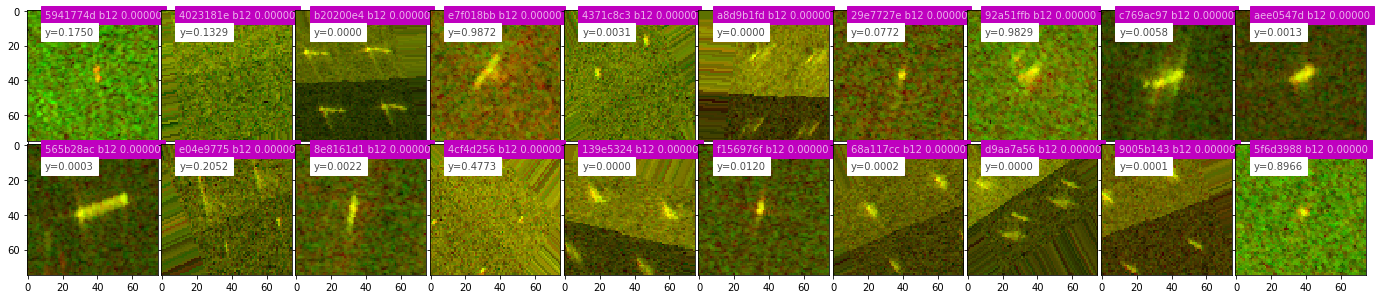

In [20]:
display_predictions(data_ids_list[1], y_probas_list[1], test_df)

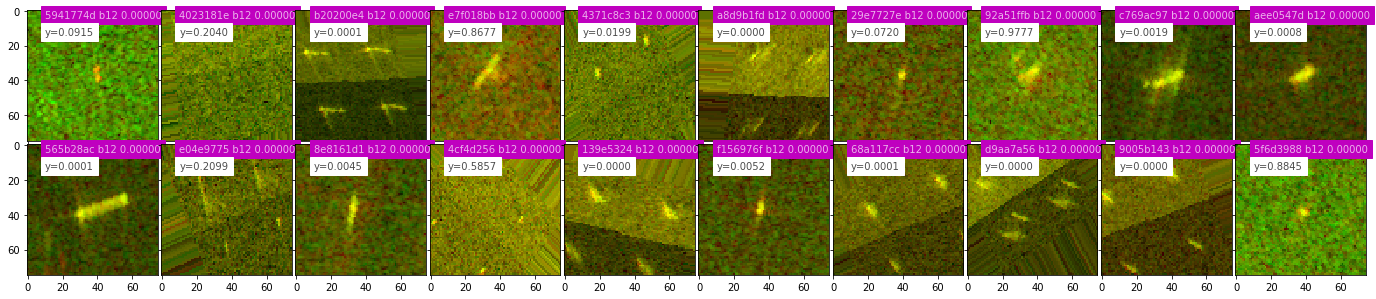

In [21]:
display_predictions(data_ids_list[2], y_probas_list[2], test_df)

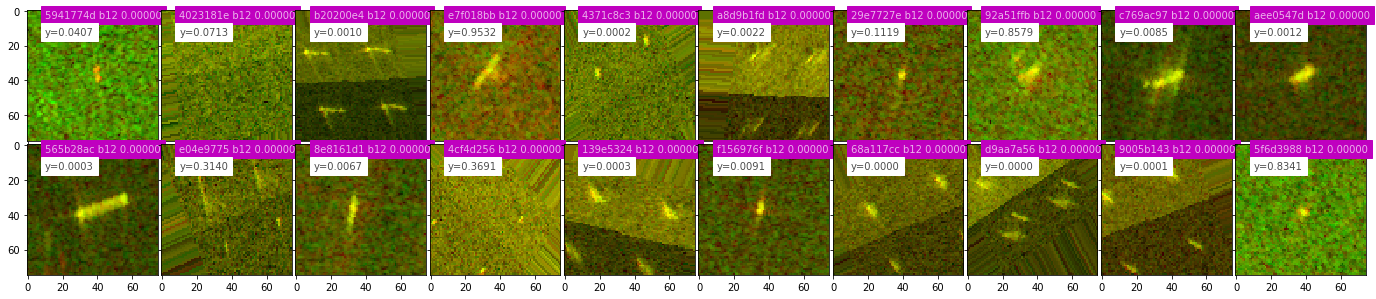

In [22]:
display_predictions(data_ids_list[3], y_probas_list[3], test_df)